# Introduction to Classification

The goal of classification is to correctly assign a label to unseen instances of the input data. 
Here, we will introduce basic approaches to classification

## The data
For the first example, we will use the iris dataset.
This set consists of 4 measurements on three classes or irises. 
The data contains 50 exemplars per class. The size of the entire dataset is 150 exemplars.
This dataset is available with the sklearn library.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

# load the iris data set
iris = datasets.load_iris()
# extract input output pairs
X = iris.data
Y = iris.target

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
print(X.shape)
print(Y.shape)
print(Y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Exercise 1
Make a scatter plot using the first two dimensions (column of X) of the dataset.
Color points by their label value (Y)

You can use the function "plt.scatter"
Hint: use ListedColormap to define the color for each class

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


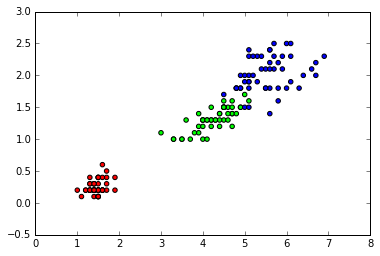

In [10]:
## Write some lines of code here
print(iris.feature_names)
my_cmap = ListedColormap([[1,0,0], [0,1,0], [0,0,1]])
plt.scatter(X[:,2], X[:, 3], s=20, c=Y, cmap=my_cmap)
plt.show()

# First classification strategy: Asign ta point the class of the nearest point in the training dataset
This strategy is known as the 1-nearest neighbor classification rule (1-NN). To implement this strategy, we need to define a distance between input vectors

In [11]:
def euclideanDistance(x1, x2):
    d2 = np.sum((x1 - x2)**2, axis=1)
    return np.sqrt(d2)

class oneNNClassifier(object):
    def __init__(self, X_train, Y_train, dist=euclideanDistance):
        self.X_train = X_train
        self.Y_train = Y_train
        self.dist = dist
    
    def classify(self, X):
        Y = np.zeros(X.shape[0], dtype=np.int)
        for i, Xi in enumerate(X):
            NNidx = np.argmin(self.dist(Xi, self.X_train))
            Y[i] = self.Y_train[NNidx]
        return Y
        
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


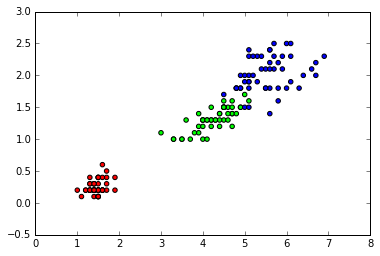

In [28]:
# test the classifier on the train data
my1NN = oneNNClassifier(X, Y)
Y_test = my1NN.classify(X)
print(Y_test)


# Exercise 2
Extend the 1-NN classifier to k-NN. We will use majority vote to decide the class of the test sample.

Hint: You can use np.argpartition(A, k) to find the indexes of the k elements of the list with the smallest values, and np.unique to implement the majority vote rule.

In [25]:
## Write some lines of code here
a = np.array([1, 1, 1, 3, 2, 2, 4])
a_unique, a_inverse, a_counts = np.unique(a, return_inverse=True, return_counts=True)
print(a_unique)
print(a_inverse)
print(a_counts)
print(a)
class kNNClassifier(object):
    def __init__(self, X_train, Y_train, dist=euclideanDistance):
        self.X_train = X_train
        self.Y_train = Y_train
        self.dist = dist
    
    def classify(self, X, k=1):
        Y = np.zeros(X.shape[0], dtype=np.int)
        for i, Xi in enumerate(X):
            kNNidx = np.argpartition(self.dist(Xi, self.X_train), kth=k)[:k]
            Y_unique, Y_count = np.unique(self.Y_train[kNNidx], return_counts=True)
            Majority_idx = np.argmax(Y_count)
            Y[i] = Y_unique[Majority_idx]
        return Y


[1 2 3 4]
[0 0 0 2 1 1 3]
[3 2 1 1]
[1 1 1 3 2 2 4]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


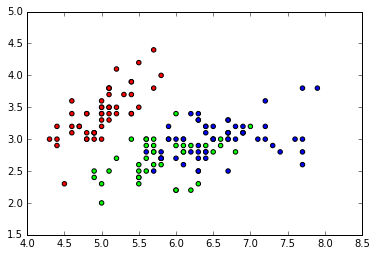

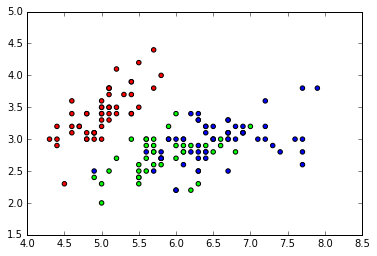

In [31]:
# test the classifer on the train data
mykNN = kNNClassifier(X, Y)
Y_test = mykNN.classify(X,5)
print(Y_test)
plt.figure()
plt.scatter(X[:,0], X[:, 1], s=20, c=Y_test, cmap=my_cmap)
plt.show()
plt.figure()
plt.scatter(X[:,0], X[:, 1], s=20, c=Y, cmap=my_cmap)
plt.show()

## Linear classification using softmax
In this exercise, we implemneted the kNN classifier to gain intuition about classification problem and create a baseline.
For linear classification, we will use the functions available in scikit-learn library

[[  8.79681649e-01   1.20307538e-01   1.08131372e-05]
 [  8.92083069e-01   1.07910759e-01   6.17176870e-06]
 [  8.30668332e-01   1.69316458e-01   1.52093733e-05]
 [  8.07811588e-01   1.92136477e-01   5.19350231e-05]
 [  9.00222082e-01   9.97646975e-02   1.32206853e-05]
 [  2.98900777e-02   8.60393138e-01   1.09716785e-01]
 [  2.93117962e-02   7.72717609e-01   1.97970595e-01]
 [  6.20745751e-03   2.73106189e-01   7.20686354e-01]
 [  3.60902230e-02   8.03217466e-01   1.60692311e-01]
 [  8.98003281e-03   5.99716389e-01   3.91303578e-01]
 [  1.86036022e-04   1.48760823e-01   8.51053141e-01]
 [  2.99635433e-03   2.78024684e-01   7.18978962e-01]
 [  5.04477452e-04   2.25292722e-01   7.74202801e-01]
 [  1.61719140e-04   4.27941843e-01   5.71896438e-01]
 [  4.46290865e-04   2.02461924e-01   7.97091785e-01]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]


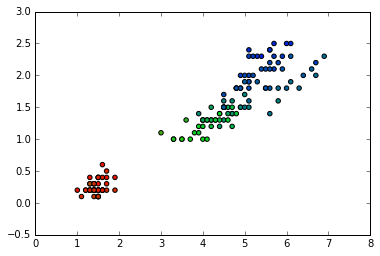

In [38]:
from sklearn.linear_model import LogisticRegression

mySoftmax = LogisticRegression()
mySoftmax.fit(X, Y)
Y_test = mySoftmax.predict(X)
P_test = mySoftmax.predict_proba(X)

print (P_test[::10])
print (Y_test[::10, None])
plt.scatter(X[:,2], X[:, 3], s=20, c=P_test)
plt.show()

# Exercise 3
Compare the partitions of 1-NN , k-NN for k=[3,5,8], and the softmax logistic regression model.

In [ ]:
## Write some lines of code here